In [33]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library
import matplotlib.pyplot as plt#for plot

In [34]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

Python: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
seaborn: 0.10.0
sklearn: 0.22.2.post1


In [35]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

开始先预处理数据

In [36]:
data = pd.read_csv("D:\web安全\Cryptography-ML-project\ids.csv")
data.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN


文件导入正常接下来看数据特征

In [6]:
x, y = data.shape
print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of traffic.')

We have  236052  number of observations and  78  features for this dataset to predict type of traffic.


In [7]:
data.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                      float64
 Idle Min                      float64
 Label                          object
Length: 79, dtype: object

描述数据，给的数据要判断异常，源数据是判断dos类型 benign是正常工作流量包，

([<matplotlib.patches.Wedge at 0x23a85f84080>,
 [Text(-1.1893859614079236, -0.15925148289968621, 'BENIGN'),
  Text(1.1893859763181185, 0.15925137154133442, 'DoS')],
 [Text(-0.6938084774879555, -0.09289669835815027, '54.2%'),
  Text(0.6938084861855691, 0.09289663339911175, '45.8%')])

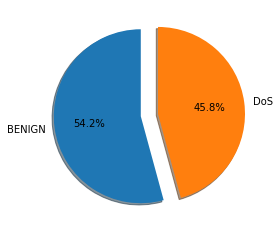

In [11]:
data[' Label'].value_counts()
label = 'BENIGN', 'DoS'
value = data[' Label'].value_counts()
fig1, ax1 = plt.subplots()
explodeTuple = (0.1, 0.1)
ax1.pie(value, explode = explodeTuple, labels = label, autopct='%1.1f%%',
        shadow=True, startangle=90)

将数字型特征拿出，取名num_fea (number features) 以01判断型特征拿出取名 binary_fea

In [14]:
num_fea = data[[" Destination Port",
           " Flow Duration",
           " Total Fwd Packets",
           " Total Backward Packets",
           "Total Length of Fwd Packets",
           " Total Length of Bwd Packets",
           " Down/Up Ratio",
           " Fwd Packet Length Max",
           " Fwd Packet Length Min",
           " Fwd Packet Length Mean",
           " Fwd Packet Length Std",
           "Bwd Packet Length Max",
           " Bwd Packet Length Min",
           " Bwd Packet Length Mean",
           " Bwd Packet Length Std",
           "Flow Bytes/s",
           " Flow Packets/s",
           " Flow IAT Mean",
           " Flow IAT Std",
           " Flow IAT Max",
           " Flow IAT Min", 
           "Fwd IAT Total",
           " Fwd IAT Mean",
           " Fwd IAT Std",
           " Fwd IAT Max", 
           " Fwd IAT Min",
           "Bwd IAT Total", 
           " Bwd IAT Mean",
           " Bwd IAT Std", 
           " Bwd IAT Max", 
           " Bwd IAT Min", 
           " Fwd Header Length",
           " Bwd Header Length",
           "Fwd Packets/s",
           " Bwd Packets/s", 
           " Min Packet Length",
           " Max Packet Length",
           " Packet Length Mean",
           " Packet Length Std",
           " Packet Length Variance",
           " Avg Bwd Segment Size",
           " Average Packet Size",
           " Avg Fwd Segment Size",
           " Fwd Header Length",
           "Subflow Fwd Packets", 
           " Subflow Fwd Bytes", 
           " Subflow Bwd Packets",
           " Subflow Bwd Bytes",
           "Init_Win_bytes_forward", 
           " Init_Win_bytes_backward", 
           " act_data_pkt_fwd",
           " min_seg_size_forward",
           "Active Mean",
           " Active Std",
           " Active Max",
           " Active Min",
           "Idle Mean",
           " Idle Std",
           " Idle Max",
           " Idle Min"

 ]]
binary_fea = data[["Fwd PSH Flags",
           " Bwd PSH Flags",  # 0
           " Fwd URG Flags",  # 0
           " Bwd URG Flags",  # 0
           "FIN Flag Count", 
           " SYN Flag Count",
           " RST Flag Count",
           " PSH Flag Count",
           " ACK Flag Count",
           " URG Flag Count",
           " CWE Flag Count",  # 0
           " ECE Flag Count",
           "Fwd Avg Bytes/Bulk",  # 0
           " Fwd Avg Packets/Bulk", # 0
           " Fwd Avg Bulk Rate",  # 0
           " Bwd Avg Bytes/Bulk",  # 0
           " Bwd Avg Packets/Bulk", # 0
           "Bwd Avg Bulk Rate"]]


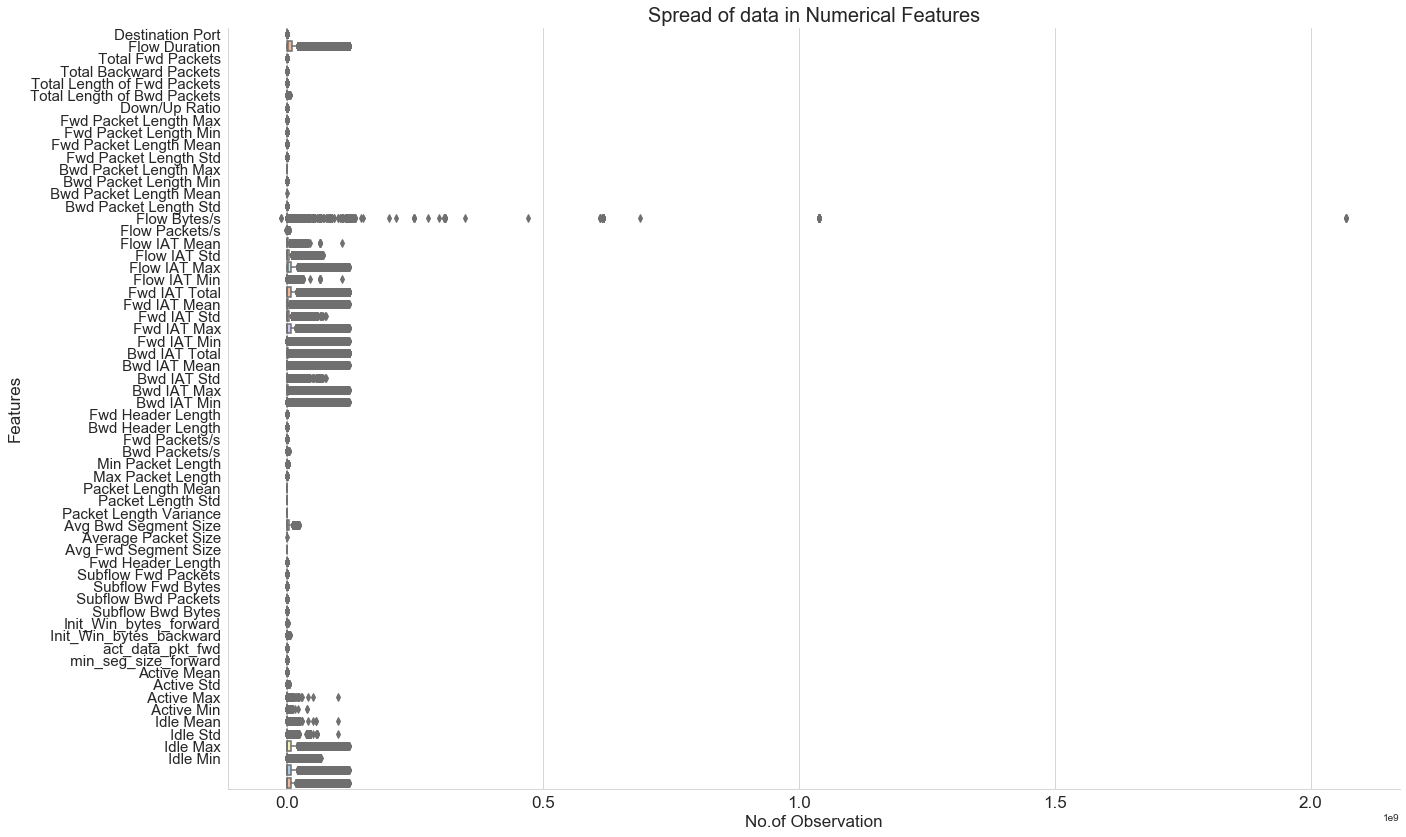

In [15]:
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

将图像画出，能看出有些数据类型如flow 数据流量， Flow IAT Mean相连流量包相差平均时间 Flow IAT Min相差最小时间 Active Max 流量快被遗弃时最大时间，Idle Std 流量被遗弃然后又激活重传标准时间 ，这些特征并不像其他特征紧密链接，而是出现跳跃，特异值聚集在一起，因为含有大量dos类型数据，所以从特征可以明显看出可疑流量。

In [8]:
df = pd.DataFrame(data)
df = df.drop(df.std()[df.std() < .3].index.values, axis=1)
df = df.drop(df.std()[df.std() > 1000].index.values, axis=1)

这里抽出一部分数据来训练，防止训练准确率太低且弄混原数据，且去掉最大最小。

In [18]:
df.shape

(236052, 23)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


开始训练模型

In [18]:
df.replace(to_replace ="BENIGN", value = 1, inplace = True)
df.replace(to_replace ="DDoS", value = 0, inplace = True)
df.head(3)

,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Fwd Header Length,Bwd Header Length,...,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Fwd Header Length.1,Bwd Avg Bulk Rate,Subflow Fwd Packets,act_data_pkt_fwd,Label
0,2,0,6,6.0,0.0,0,4.000000e+06,666666.66670,40,0,...,1,0,0,9.0,6.0,40,0,2,1,1
1,1,1,6,6.0,0.0,6,1.100917e+05,18348.62385,20,20,...,1,1,1,9.0,6.0,20,0,1,0,1
2,1,1,6,6.0,0.0,6,2.307692e+05,38461.53846,20,20,...,1,1,1,9.0,6.0,20,0,1,0,1


In [19]:
x = df.drop(' Label', 1)
y = df[' Label']
df.replace([np.inf, -np.inf], np.nan)
df.dropna(how="any", inplace = True)
df = df[~df['Flow Bytes/s'].isin(['Infinity'])]
df = df[~df[' Flow Packets/s'].isin(['Infinity'])]
df = df.iloc[:100000]

In [20]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
print('Train images shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test images shape:', X_test.shape)
print('Test labels shape:', y_test.shape)
print('Train labels:', y_train)
print('Test labels:', y_test)

Train images shape: (80000, 22)
Train labels shape: (80000,)
Test images shape: (20000, 22)
Test labels shape: (20000,)
Train labels: [0 0 1 ... 1 0 0]
Test labels: [0 0 1 ... 1 1 1]


训练模型 普通cnn全链接层 SGD优化模型

In [23]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 22))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=20,
          verbose=1, batch_size=100)

Epoch 1/20
80000/80000 [==============================] - 2s 19us/step - loss: 0.5112 - accuracy: 0.7823
Epoch 2/20
80000/80000 [==============================] - 1s 17us/step - loss: 0.2642 - accuracy: 0.9265 0s - loss: 0.281
Epoch 3/20
80000/80000 [==============================] - 1s 18us/step - loss: 0.1958 - accuracy: 0.9400
Epoch 4/20
80000/80000 [==============================] - 1s 17us/step - loss: 0.1734 - accuracy: 0.9432
Epoch 5/20
80000/80000 [==============================] - 1s 17us/step - loss: 0.1594 - accuracy: 0.9460
Epoch 6/20
80000/80000 [==============================] - 1s 17us/step - loss: 0.1505 - accuracy: 0.9484
Epoch 7/20
80000/80000 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.95 - 1s 18us/step - loss: 0.1443 - accuracy: 0.9504
Epoch 8/20
80000/80000 [==============================] - 1s 18us/step - loss: 0.1380 - accuracy: 0.9522
Epoch 9/20
80000/80000 [==============================] - 1s 18us/step - loss: 0.1336 - accuracy: 0.9

准确率很高，大概因为只选择关键特征

In [25]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20000/20000 [==============================] - 0s 14us/step
Test loss: 0.09901459613889456
Test accuracy: 0.9642999768257141


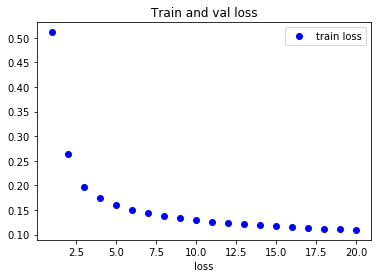

In [27]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
loss = history_dict['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='train loss')
plt.title('Train and val loss')
plt.xlabel('Epochs')
plt.xlabel('loss')
plt.legend()
plt.show()

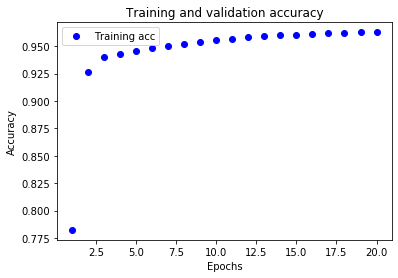

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

画出了损失和准确率图，接下来拿出流量数据进行预测，看是否有dos

In [46]:
testdata= pd.read_csv("D:\web安全\Cryptography-ML-project/test.csv")
testdata.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
1,80,483,0,3,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,No Label
2,80,9089511,47,48,835,60704,341,0,17.765957,69.698797,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,No Label


导入流量数据，标签是no label 先预处理预测只需要22个特征，看能不能预测

In [63]:
predictions = model.predict(X_test)
print(predictions[1012])
print(X_test[1012])


[0.9990879]
[0.00000000e+00 7.04721635e-04 3.87228261e-02 1.47401086e-02
 0.00000000e+00 1.11650485e-01 2.21085357e-06 1.39849099e-05
 9.53516091e-04 7.04423781e-04 1.97231834e-01 4.73281129e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42857143e-01
 5.91601411e-02 1.47401086e-02 9.53516091e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


预测第1012个测试数据可能是dos数据，可信度0.99 该测试数据值是这些，根据值反向查找可以查到原来地址